# `ecg_00.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

## 1. Open an ECG file into the `ecg` variable
We want to read the file `ECGu.txt` from the `data` folder.  
We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECGu.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECGu.txt`

In [4]:
fNameECG = "../data/ECGu.txt"

However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [6]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "../data/ECGu.txt"


### 1.2. Read the ecg file

In [ ]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ')

# 2. Plot the content of the `egc` variable 

In [ ]:
import matplotlib.pyplot as plt 

# Sampling frequency
Fe = 1024  

# ADC Gain
Gain_ADC = 520e-6  

# Converting ECGs to mV taking gain into account
ecg_mV = ecg * (Gain_ADC * 1000) 

# Creation of the time axis
time_axis = [i / Fe for i in range(len(ecg_mV))]

# ECG tracing
plt.plot(time_axis, ecg_mV, label='Leads (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Leads (mV)')
plt.title('ECG')
plt.show()

print("ecg_00.ipynb finished")


In [93]:
import pandas as pd

# Creation of a dataframe
ECG = pd.read_csv (fNameECG, sep=" ")
print(ECG)


      -275.0\t  -119.0\t  -119.0\t.1  Unnamed: 3
0       -275.0    -119.0      -119.0         NaN
1       -275.0    -118.0      -121.0         NaN
2       -275.0    -121.0      -112.0         NaN
3       -273.0    -120.0      -105.0         NaN
4       -274.0    -124.0      -101.0         NaN
...        ...       ...         ...         ...
6494       3.0     -92.0        28.0         NaN
6495       1.0     -86.0        22.0         NaN
6496      -4.0     -83.0        21.0         NaN
6497      -9.0     -88.0        31.0         NaN
6498     -16.0     -96.0        33.0         NaN

[6499 rows x 4 columns]


In [95]:
ECG.columns= ['I', 'II', 'III', 'IV']
print(ECG)


          I     II    III  IV
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -118.0 -121.0 NaN
2    -275.0 -121.0 -112.0 NaN
3    -273.0 -120.0 -105.0 NaN
4    -274.0 -124.0 -101.0 NaN
...     ...    ...    ...  ..
6494    3.0  -92.0   28.0 NaN
6495    1.0  -86.0   22.0 NaN
6496   -4.0  -83.0   21.0 NaN
6497   -9.0  -88.0   31.0 NaN
6498  -16.0  -96.0   33.0 NaN

[6499 rows x 4 columns]


In [97]:
ecg = ECG.drop("IV", axis=1)

In [99]:
print(ecg)

          I     II    III
0    -275.0 -119.0 -119.0
1    -275.0 -118.0 -121.0
2    -275.0 -121.0 -112.0
3    -273.0 -120.0 -105.0
4    -274.0 -124.0 -101.0
...     ...    ...    ...
6494    3.0  -92.0   28.0
6495    1.0  -86.0   22.0
6496   -4.0  -83.0   21.0
6497   -9.0  -88.0   31.0
6498  -16.0  -96.0   33.0

[6499 rows x 3 columns]


In [101]:
ecg_I = ecg[['I']]
ecg_II = ecg[['II']]
ecg_III = ecg[['III']]
print(ecg_I)

          I
0    -275.0
1    -275.0
2    -275.0
3    -273.0
4    -274.0
...     ...
6494    3.0
6495    1.0
6496   -4.0
6497   -9.0
6498  -16.0

[6499 rows x 1 columns]


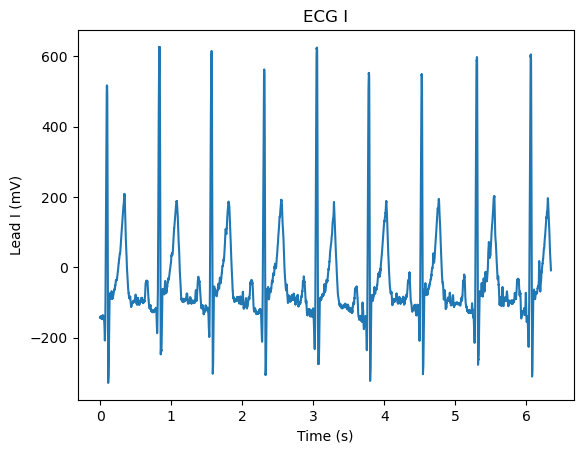

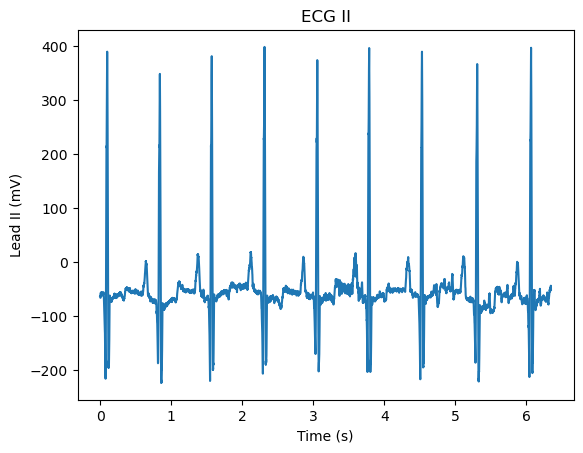

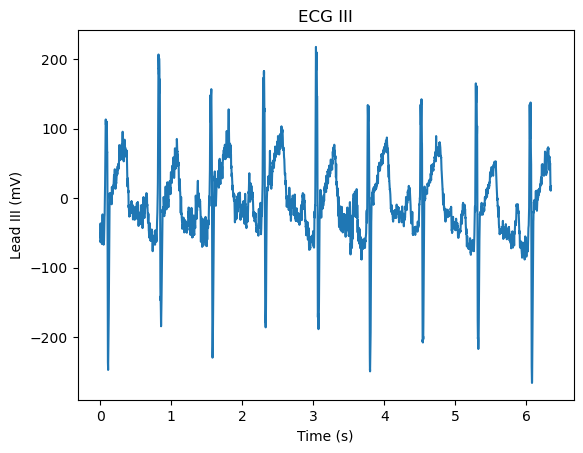

In [103]:
import matplotlib.pyplot as plt 

# Sampling frequency 
Fe = 1024  

# ADC Gain
Gain_ADC = 520e-6  

# Creation of the time axis
time_axis = [i / Fe for i in range(len(ecg_I_mV))]

# Converting ECG to mv taking gain into account
ecg_I_mV = ecg_I * (Gain_ADC * 1000)
ecg_II_mV = ecg_II * (Gain_ADC * 1000)
ecg_III_mV = ecg_III * (Gain_ADC * 1000)


# ECG I tracing
plt.plot(time_axis, ecg_I_mV, label='Lead I (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Lead I (mV)')
plt.title('ECG I')
plt.show()

# ECG II tracing
plt.plot(time_axis, ecg_II_mV, label='Lead II (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (mV)')
plt.title('ECG II')
plt.show()

# ECG III tracing
plt.plot(time_axis, ecg_III_mV, label='Lead III (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Lead III (mV)')
plt.title('ECG III')
plt.show()


# 1.2.3.
The ECG does not appear to be properly calibrated because the amplitude ranges from -600 mV to +600 mV, which is higher than the typical magnitude seen on an ECG.

This is not a normal ECG as the QRS complexes appear very close together, which could indicate tachycardia.